In [22]:
# from google.colab import files
  
  
# uploaded = files.upload()

In [2]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [5]:
df.shape

(2227, 3)

In [6]:
df.info()
#you can observe some missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [7]:
df.isnull().sum()
# 5 null values in x1 and 3 in x2

x1    5
x2    3
y     0
dtype: int64

In [8]:
df.notnull().sum()

x1    2222
x2    2224
y     2227
dtype: int64

In [9]:
# dropping all the null values bcoz they are very less
df = df.dropna(axis=0, subset=['x1'])
df = df.dropna(axis=0, subset=['x2'])

In [10]:
df.isnull().sum()
# no null values

x1    0
x2    0
y     0
dtype: int64

In [11]:
df.notnull().sum()

x1    2219
x2    2219
y     2219
dtype: int64

In [12]:
df.shape

(2219, 3)

In [13]:
df.dtypes

x1    float64
x2    float64
y       int64
dtype: object

In [14]:
# df=df['y'].astype('float')

# Performing EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


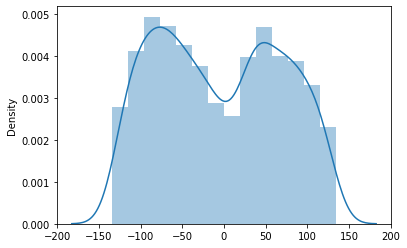

In [17]:
sns.distplot(x=df['x1'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


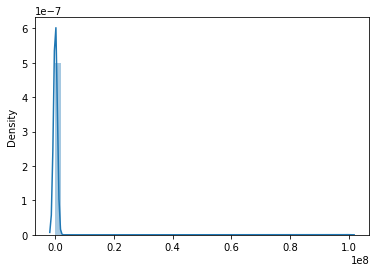

In [18]:
sns.distplot(x=df['x2'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


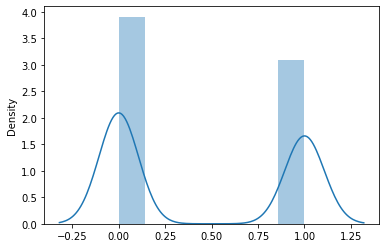

In [19]:
sns.distplot(x=df['y'])

# Observations
- x1 and x2 are real number columns
- x2 seems to have very huge outliers 
- y is a categorical column

In [20]:
# treating outliers

In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


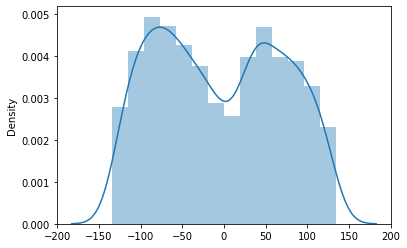

In [22]:
sns.distplot(x=df['x1'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


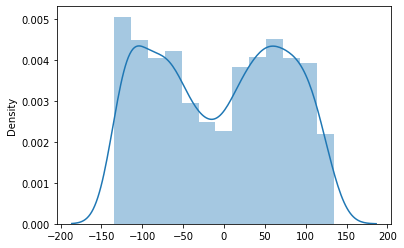

In [23]:
sns.distplot(x=df['x2'])

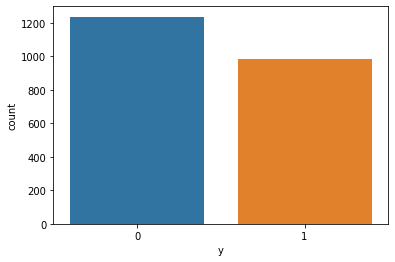

In [25]:
sns.countplot(x=df['y'])

In [49]:
df.shape

(2217, 3)

# Observations
- x1 and x2 now look almost similar (and somwhat look like normal distribution)
- there does not seem to be a huge imbalance in the data set looking at the y column

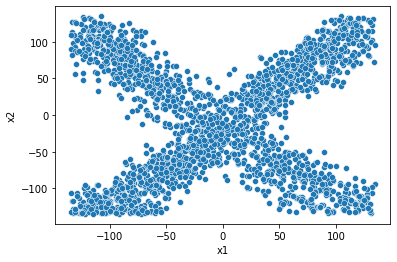

In [35]:
sns.scatterplot(x=df['x1'],y=df['x2'])

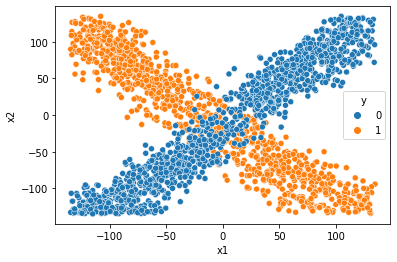

In [36]:
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['y'])

# Observations
- there seem to be 2 diagnol lines of 0 and 1 intersecting each other
- for category 0 as x1 increases , x2 also increases(directly proportional)
- for category 1 as x1 increases , x2 decreases (inversely proportional)

# Data Standardization

In [40]:
target = df['y']
data = df.drop("y",axis=1)

In [41]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(2217, 2)


# Data Preparation

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardized_data,target,test_size = 0.25, random_state = 0)

# Building different models to perform classification

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [50]:
Classifiers = [KNeighborsClassifier(),
               LogisticRegression(),
               DecisionTreeClassifier(),
               SVC(kernel='linear'),
               SVC(kernel='rbf')
               ]

Accuracy of KNeighborsClassifier is 0.9513513513513514
Confusion metrics for is: 
[[295  15]
 [ 12 233]]


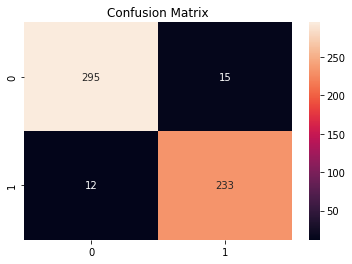

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       310
           1       0.94      0.95      0.95       245

    accuracy                           0.95       555
   macro avg       0.95      0.95      0.95       555
weighted avg       0.95      0.95      0.95       555

time taken for KNeighborsClassifier is  0.34997198199999957
Accuracy of LogisticRegression is 0.7513513513513513
Confusion metrics for is: 
[[310   0]
 [138 107]]


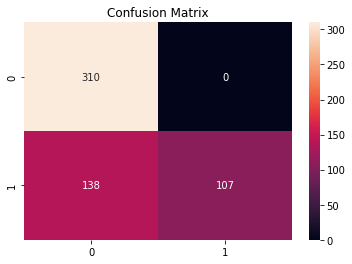

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       310
           1       1.00      0.44      0.61       245

    accuracy                           0.75       555
   macro avg       0.85      0.72      0.71       555
weighted avg       0.83      0.75      0.73       555

time taken for LogisticRegression is  0.32698331199999586
Accuracy of DecisionTreeClassifier is 0.9351351351351351
Confusion metrics for is: 
[[287  23]
 [ 13 232]]


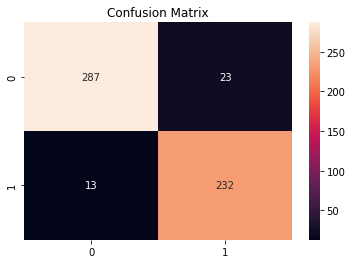

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       310
           1       0.91      0.95      0.93       245

    accuracy                           0.94       555
   macro avg       0.93      0.94      0.93       555
weighted avg       0.94      0.94      0.94       555

time taken for DecisionTreeClassifier is  0.33879639099999537
Accuracy of SVC is 0.745945945945946
Confusion metrics for is: 
[[310   0]
 [141 104]]


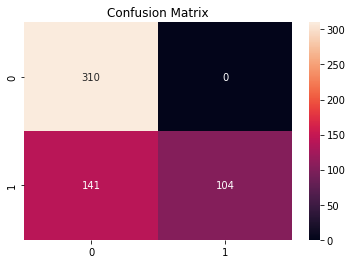

              precision    recall  f1-score   support

           0       0.69      1.00      0.81       310
           1       1.00      0.42      0.60       245

    accuracy                           0.75       555
   macro avg       0.84      0.71      0.71       555
weighted avg       0.83      0.75      0.72       555

time taken for SVC is  0.6102334509999991
Accuracy of SVC is 0.954954954954955
Confusion metrics for is: 
[[295  15]
 [ 10 235]]


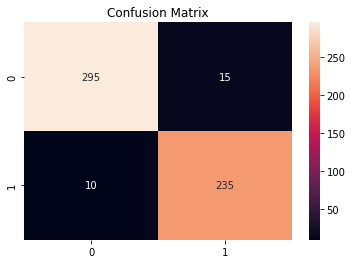

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       310
           1       0.94      0.96      0.95       245

    accuracy                           0.95       555
   macro avg       0.95      0.96      0.95       555
weighted avg       0.96      0.95      0.95       555

time taken for SVC is  0.35489005400000195
Total time taken for all the models is  0.3558067439999988


In [56]:
import time
start = time.process_time()
# your code here    

for classifier in Classifiers:
    start = time.process_time()
    model = classifier.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    con_metrics = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion metrics for is: ")
    print(con_metrics)
    sns.heatmap(con_metrics, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.show()
    #Checking Precision, Recall and F1 Score
    print(metrics.classification_report(y_test, y_pred))
    print("time taken for "+classifier.__class__.__name__+" is ",time.process_time() - start)

print("Total time taken for all the models is ",time.process_time() - start)



# Observations
- looking at the confusion matrix ,Logestic regression and svc with linear kernal seem to be performing very badly
- since the data looks like an X SVC with linear kernal will not be suitable and the same goes for logestic regression as it is difficult to seperate an X with just a line
- the best options would be SVC with rbf kernal ,KNN classifier and Decision trees
- We will be performing hyper parameter tunig on SVC with rbf kernal ,KNN classifier and Decision treesbecause they are the models which makes more sense with the data which is given

# HyperParameter Tuning

## 1.KNN

In [58]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [61]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5,10,15,25,50,100], 'p':[1, 2, 3]}]
clf = GridSearchCV(
    KNeighborsClassifier(), tuned_parameters, scoring='accuracy'
)
clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'n_neighbors': 15, 'p': 2}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

0.9531531531531532


# The Best parameters for knn are k=15 and  metric='minkowski with 95% accuracy

# 2.SVC with rbf kernel

In [63]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(10) , 'C': [0.0001,0.001,0.1, 10, 100, 1000]}]
clf = GridSearchCV(
    SVC(), tuned_parameters, scoring='accuracy'
)
clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'C': 0.1, 'gamma': 0.8160574886155975, 'kernel': 'rbf'}
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.8160574886155975,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

0.9459459459459459


In [64]:
#since we are getting gamma around 0.8 ,trying agian with closest numbers

In [77]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.4,0.5,0.6,0.8,0.7,0.9,1,1.1,1.5] , 'C': [0.1]}]
clf = GridSearchCV(
    SVC(), tuned_parameters, scoring='accuracy'
)
clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'C': 0.1, 'gamma': 1.5, 'kernel': 'rbf'}
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.9531531531531532


In [68]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1.5,3,10,25,50,100,1000,10000] , 'C': [0.1]}]
clf = GridSearchCV(
    SVC(), tuned_parameters, scoring='accuracy'
)
clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'C': 0.1, 'gamma': 50, 'kernel': 'rbf'}
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.9513513513513514


# the Best parameters for SVC with rbf kernel are {'C': 0.1, 'gamma': 1.5, 'kernel': 'rbf'} with accuracy of 95%

# 3.Decision tree

In [76]:
tuned_parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,10,50,25,100],
           "min_samples_leaf":[1,2,3,5,10,50,50,100],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,50,100] }
clf = GridSearchCV(
    DecisionTreeClassifier(), tuned_parameters, scoring='accuracy'
)
clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_leaf': 50, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.1, presort='deprecated',
                       random_state=None, splitter='best')

0.8900900900900901


# The Decision tree seems to be performing well with default hyper parameters with an accuracy of 93%

# Model comparision

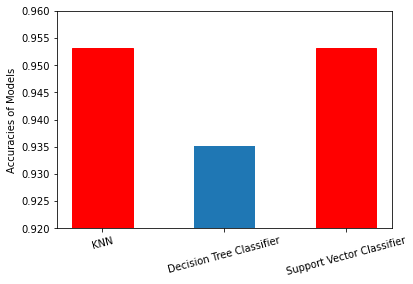

In [78]:
import math
model_names=['KNN','Decision Tree Classifier','Support Vector Classifier']
model_accuracies=[0.9531,0.9351,0.9531]
low=0.92
high=0.96
plt.ylim(low,high)
plt.xticks(rotation=15)
plt.ylabel("Accuracies of Models")
plot1=plt.bar(model_names,model_accuracies,width=0.5)
plot1[0].set_color('red')
plot1[2].set_color('red')

# KNN and SVM with rbf krnel seem to be giving the exact same accuricies  of 95 % wheras decision tree is giving an accuracy of 93%